# Аналитика в авиакомпании

Авиакомпании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У yас есть файлы, в которых содержатся результаты запросов.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.


**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

# 1. Аналитика

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
flights_in_september = pd.read_csv('/datasets/query_1.csv')
flights_in_september

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
average_flights_in_september = pd.read_csv('/datasets/query_3.csv')
average_flights_in_september

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
average_flights_in_september.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


*average_flights* округлим до целого и приведем к типу *int*, потому что число полетов по смыслу целочисленная величина.

In [6]:
average_flights_in_september['average_flights'] = average_flights_in_september['average_flights'].round(0).astype('Int64')

In [7]:
# топ-10 городов по количеству рейсов
top10_cities = average_flights_in_september.sort_values('average_flights', ascending = False).head(10)
top10_cities

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

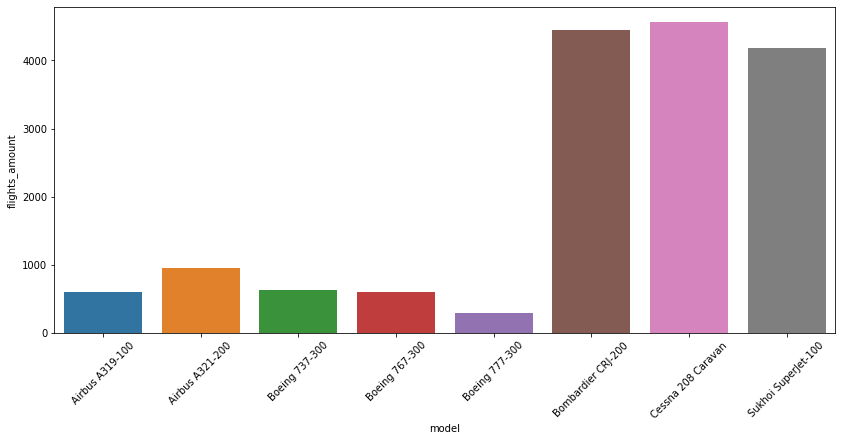

In [8]:
plt.figure(figsize=(14, 6))
sns.barplot(x='model', y='flights_amount', data=flights_in_september)
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

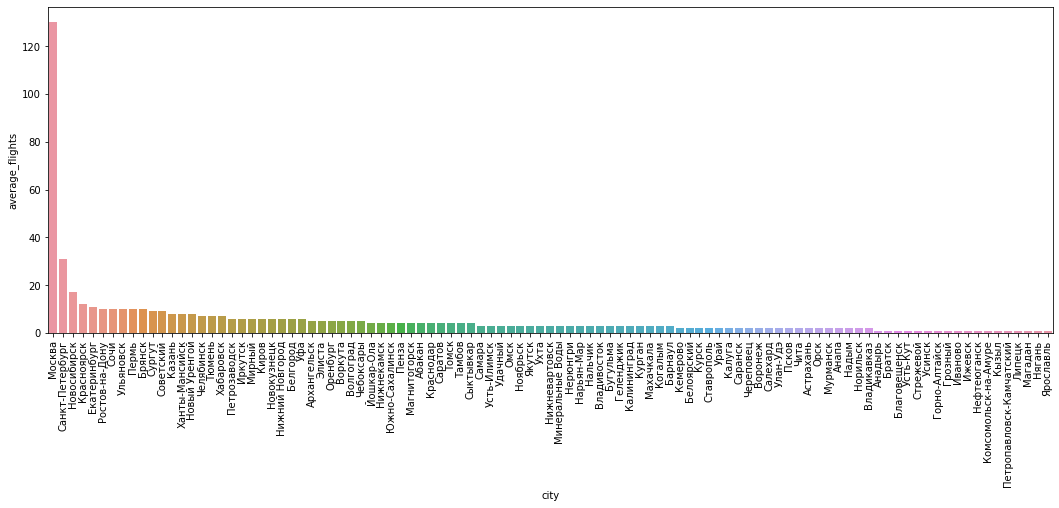

In [9]:
# среднее количество рейсов, прибывающих в город за день в сентябре 2018 года для каждого города
plt.figure(figsize=(18, 6))
sns.barplot(x='city', y='average_flights', data=average_flights_in_september.sort_values('average_flights', ascending=False))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

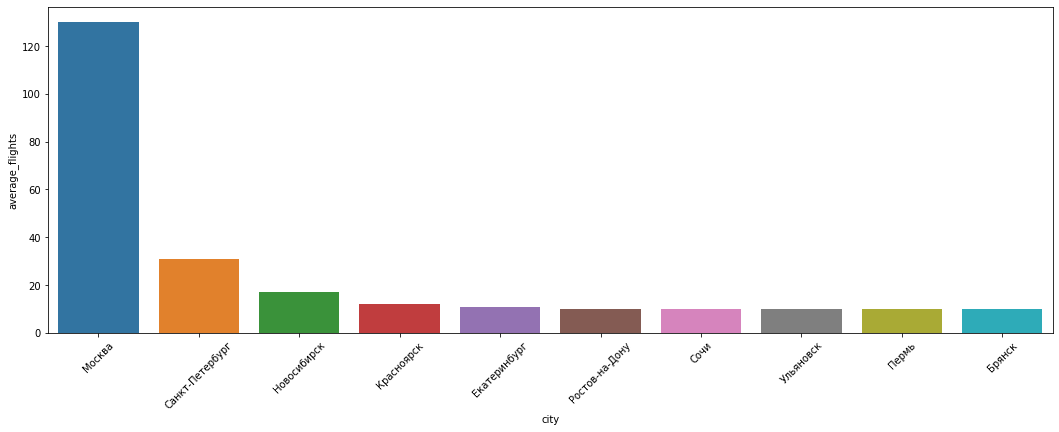

In [10]:
plt.figure(figsize=(18, 6))
sns.barplot(x='city', y='average_flights', data=top10_cities)
plt.xticks(rotation=45)

### Выводы

- Лидерами по количеству рейсов явлются Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 с количеством рейсов от 4100 до 4500. Первые два маловместительные самолеты, особенно Cessna, который имеет 14 посадочных мест. Все они не рассчитаны на длительные перелеты и используются больше для местных региональных рейсов, отсюда и количество рейсов. Кроме того большое количество рейсов, выполняемых самолетом Sukhoi SuperJet-100 (российского производства) объясняется еще и тем, что мы рассматривваем российские города и в 2018 году он еще активно использовался.
- Самые частые для посещения города очевидно Москва и Санкт-Петербург далее идут города миллионики и по мере уменьшения численности и востребованности города уменьшается число прилетов. Но как Брянск мог попасть в топ 10 городов для меня остается загадкой.

# 2. Проверка гипотезы

In [11]:
festivals = pd.read_csv('/datasets/query_last.csv')
festivals

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [12]:
festivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Есть пропуска в столбцах *festival_week* и *festival_name* - это нормально, ведь не каждую неделю проводятся фестивали. Столбец *festival_week* почему-то дробного типа, надо его превести к целочисленному.

In [13]:
festivals['festival_week'] = festivals['festival_week'].astype('Int64')

In [14]:
ticket_not_fest = festivals[festivals['festival_name'].isna() == True]['ticket_amount']

In [15]:
ticket_fest = festivals[festivals['festival_name'].isna() == False]['ticket_amount']

Так как объем выборки мал, надо использовать непараметрический критерий. Возьмем критерий Манна-Уитни.

Гипотезу H0 сформулируем так: cредний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время. Альтернативная гипотеза H1: средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.

In [16]:
alpha = .05
results = st.mannwhitneyu(ticket_not_fest, ticket_fest, alternative='two-sided')
if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не удалось отвергнуть нулевую гипотезу')
results.pvalue

не удалось отвергнуть нулевую гипотезу


0.06824748837800128

Итак, не отвергаем нулевую гипотезу, значит, средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Так как данных мало, сложно сделать уверенные выводы, если присмотреться к данным, то можно сделать вывод, что во время фестивалей спрос на билеты даже меньше, чем в обычное время. Для уточнения этого вопроса требуется больше данных.